# meta-SNE

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.spatial.distance import euclidean as distance
from sklearn.manifold import TSNE

from os import listdir
import gc

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'

In [2]:
def distance_matrix(outputs):
    '''
    outputs -- ordered list of representations for all images
    '''
    distances = []
    for i in range(100):
        for j in range(i+1, 100):
            dist = distance(outputs[i], outputs[j])
            distances.append(dist)
    return distances

net = 'densenet/'

representations = []
fileNames = listdir('activation_data/' + net)

def filterNames(names):
    filtered = []
    for name in names:
        if 'fc' not in name:
            filtered.append(name)
    return filtered

fileNames = filterNames(fileNames)

for name in fileNames:
    print('Generating ' + name)
    representations.append(distance_matrix(np.load('activation_data/' + net + name).flatten()))
    gc.collect()
representations = np.stack(representations)

normalizedReps = []
for r in representations:
    norm = np.linalg.norm(r)
    normalizedReps.append(r / (norm ** .5))
representations = normalizedReps
for r in representations:
    print(r)

Generating featuresdenseblock2denselayer4conv2.npy
Generating featuresdenseblock2denselayer9conv1.npy
Generating featuresdenseblock3denselayer3conv1.npy
Generating featuresdenseblock2denselayer7conv2.npy
Generating featuresdenseblock4denselayer14conv2.npy
Generating featuresdenseblock3denselayer20conv2.npy
Generating featuresdenseblock4denselayer10conv1.npy
Generating featuresdenseblock4denselayer16conv1.npy
Generating featuresdenseblock4denselayer17conv2.npy
Generating featuresdenseblock4denselayer7conv1.npy
Generating featuresdenseblock3denselayer16conv2.npy
Generating featuresdenseblock2denselayer10conv2.npy
Generating featuresdenseblock2denselayer5conv1.npy
Generating featuresdenseblock3denselayer18conv1.npy
Generating featuresdenseblock4denselayer12conv1.npy
Generating featuresdenseblock3denselayer22conv1.npy
Generating featuresdenseblock3denselayer29conv2.npy
Generating featuresdenseblock1denselayer5conv2.npy
Generating featuresdenseblock2denselayer8conv1.npy
Generating featuresd

[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 159 / 159
[t-SNE] Mean sigma: 0.271952
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.126604
[t-SNE] Error after 7450 iterations: 1.140961


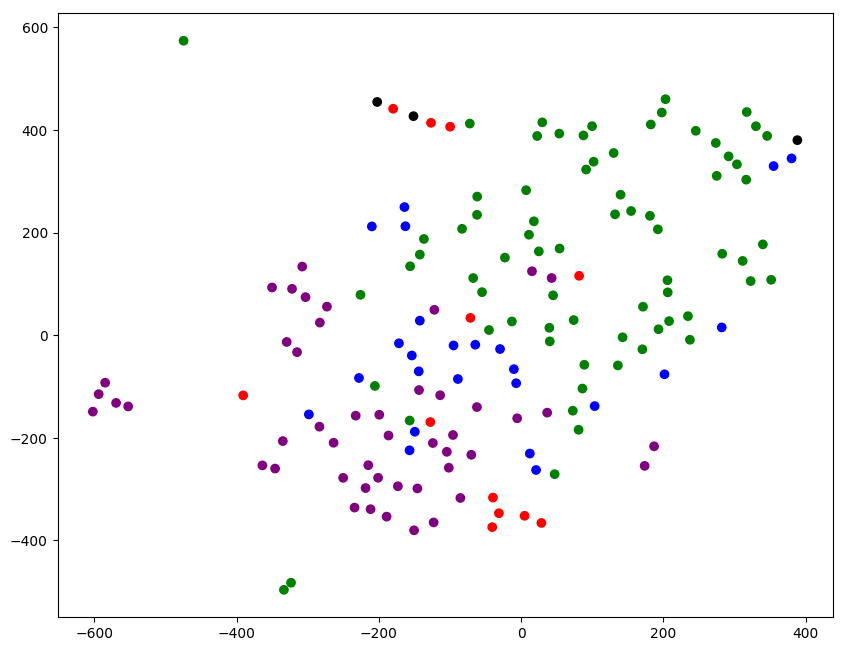

In [12]:
embedded = TSNE(n_components=2, verbose=1, perplexity=6, learning_rate=500, n_iter=15000, method='exact', init='pca').fit_transform(representations)
# print(embedded)

def color(name):
    if 'block1' in name:
        return 'red'
    elif 'block2' in name:
        return 'blue'
    elif 'block3' in name:
        return 'green'
    elif 'block4' in name:
        return 'purple'
    else:
        return 'black'
    
colors = [color(name) for name in fileNames]

X, Y = embedded[:,0], embedded[:,1]
plt.scatter(X,Y, c=colors)
plt.show()